In [1]:
import glob
import csv
import re
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

### Setup

In [2]:
csvFileList = Path('./').rglob('*.csv')
# csvFileList = Path('./learning_rate').rglob('*.csv') # Point this to your path to compare your results
maxFilesPerPlot = 10 # adjust this to determine how many lines you want to plot in each figure

### If you are running this from Colab and not your local environment, we need to fetch the Repo first

In [3]:
RunningInCOLAB = 'google.colab' in str(get_ipython())
if RunningInCOLAB:
    !git clone https://github.com/constantin-huetterer/DL2020
    !cd DL2020

Error in file: model_logs_dropout_6_20_epochs  - Not all lines from this file were processed.


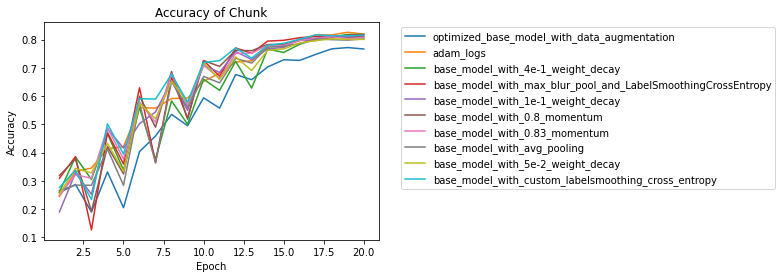

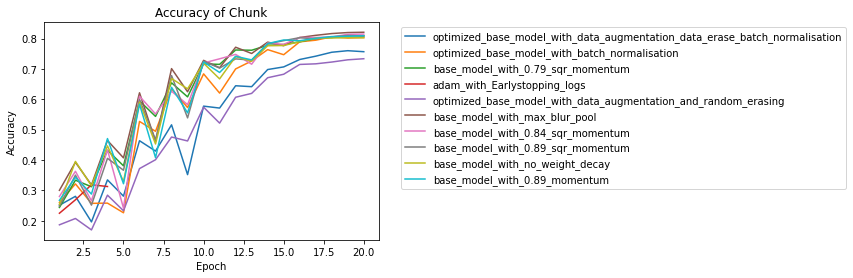

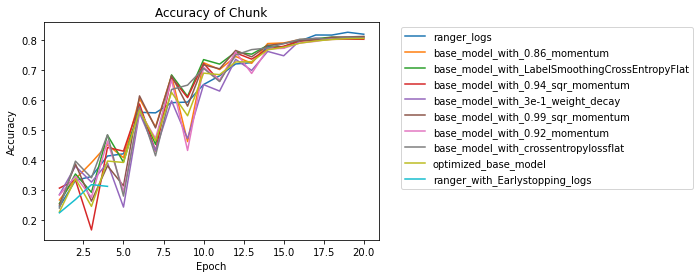

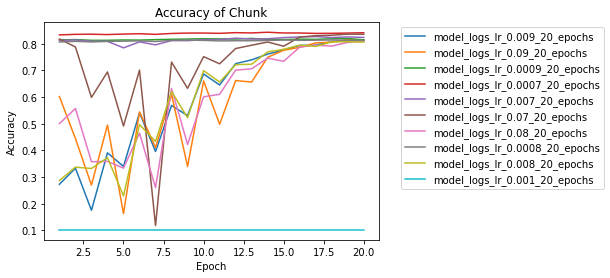

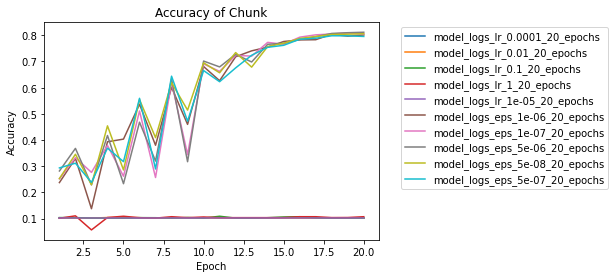

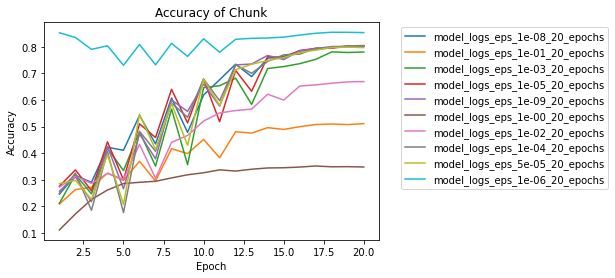

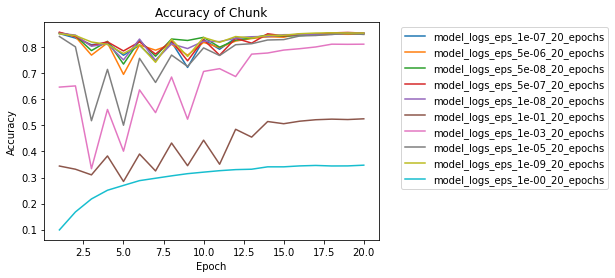

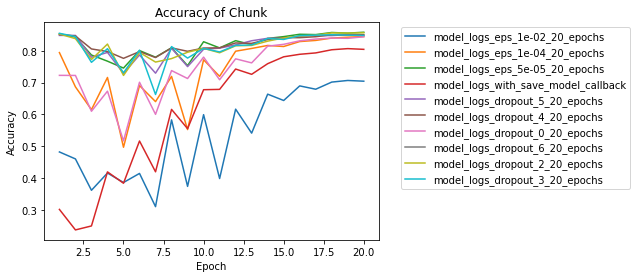

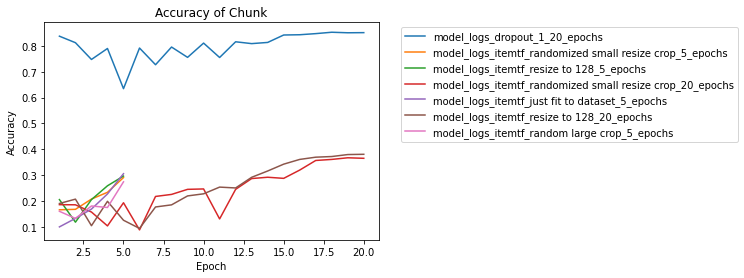

In [4]:
fNameRegex = re.compile(r'(?:.*/)?(.*)(?:\.csv$)')

for fileCnt,filePath in enumerate(csvFileList):
    fName = fNameRegex.search(filePath.name).groups()[0]
    with open(filePath.absolute(), 'r') as file:
        csvreader = csv.reader(file, delimiter=',')
        rows = []
        for i,row in enumerate(csvreader):
            try:
                if row[0].isdecimal():
                    rows.append(float(row[3]))
            except:
                print('Error in file:', fName, ' - Not all lines from this file were processed.')
        if fileCnt % maxFilesPerPlot == 0:
            fig, ax = plt.subplots() 
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Accuracy')
            ax.set_title("Accuracy of Chunk")
        ax.plot(range(1,len(rows)+1), rows, label=fName)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 